In [32]:
import pandas as pd
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./data/train.csv")

print("Shape:", train_df.shape)
train_df

Shape: (603, 27)


,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,GBM,TCGA-06-A6S0,Male,79 years 183 days,Glioblastoma,black or african american,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,1,LGG,TCGA-HT-8106,Male,53 years 197 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
2,2,LGG,TCGA-HT-7607,Female,61 years 305 days,"Astrocytoma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,3,LGG,TCGA-QH-A6X5,Female,58 years 55 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,4,LGG,TCGA-P5-A5F1,Male,30 years 113 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,598,GBM,TCGA-06-0744,Male,67 years,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
599,599,LGG,TCGA-DU-A6S7,Female,27 years 309 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
600,600,LGG,TCGA-DU-5853,Male,29 years 32 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
601,601,LGG,TCGA-DU-A76R,Male,51 years 312 days,"Oligodendroglioma, anaplastic",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [3]:
train_df.columns.tolist()

['Unnamed: 0',
 'Grade',
 'Case_ID',
 'Gender',
 'Age_at_diagnosis',
 'Primary_Diagnosis',
 'Race',
 'IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

In [4]:
train_df.dtypes

Unnamed: 0            int64
Grade                object
Case_ID              object
Gender               object
Age_at_diagnosis     object
Primary_Diagnosis    object
Race                 object
IDH1                 object
TP53                 object
ATRX                 object
PTEN                 object
EGFR                 object
CIC                  object
MUC16                object
PIK3CA               object
NF1                  object
PIK3R1               object
FUBP1                object
RB1                  object
NOTCH1               object
BCOR                 object
CSMD3                object
SMARCA4              object
GRIN2A               object
IDH2                 object
FAT4                 object
PDGFRA               object
dtype: object

In [5]:
missing = (
    train_df.isna()
    .sum()
    .sort_values(ascending=False)
)

missing[missing > 0]

Series([], dtype: int64)

# Base EDA

We got all features categorical, which are not machine interpetable from the box, most of them can be converted, so we complete let's perform some feature analysis first.

At first, we'll find out featires can be binarized by checking unique values set:

In [6]:
from preprocessing_scripts.dataset_preprocessing import print_unique_values

print_unique_values(train_df)


Column: Unnamed: 0
Number of unique values: 603
First 20 unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
... (truncated)

Column: Grade
Number of unique values: 2
Unique values: ['GBM' 'LGG']

Column: Case_ID
Number of unique values: 603
First 20 unique values: ['TCGA-06-A6S0' 'TCGA-HT-8106' 'TCGA-HT-7607' 'TCGA-QH-A6X5'
 'TCGA-P5-A5F1' 'TCGA-CS-4941' 'TCGA-87-5896' 'TCGA-76-6656'
 'TCGA-26-5136' 'TCGA-S9-A6WQ' 'TCGA-VM-A8CB' 'TCGA-32-4208'
 'TCGA-DB-A4XD' 'TCGA-76-6191' 'TCGA-12-0819' 'TCGA-HT-7692'
 'TCGA-06-6693' 'TCGA-76-6192' 'TCGA-TM-A84O' 'TCGA-RY-A845']
... (truncated)

Column: Gender
Number of unique values: 3
Unique values: ['Male' 'Female' '--']

Column: Age_at_diagnosis
Number of unique values: 595
First 20 unique values: ['79 years 183 days' '53 years 197 days' '61 years 305 days'
 '58 years 55 days' '30 years 113 days' '67 years 107 days'
 '50 years 129 days' '66 years 159 days' '78 years 7 days'
 '57 years 314 days' '33 years 287 days' '25 y

Here are what we will do with those features accordingly to analysis:

| Feature | Observations | Processing pipeline | Requires additional analysis |
|-|-|-|-|
| `Unnamed: 0` | 603 unique occurences as well as full dataset length, looks just like data item index, feature is useless for following data analysis | Remove that feature column  | - |
| `Grade` | Target column, 2 unique values, so can be binarized | Binarize feature, keep label <-> id mapping for easier future inerpretation | - |
| `Case_ID` | 603 unique occurences as well as full dataset length, seems those are unique certain medical treatment IDs, feature is useless for following data analysis | Remove that feature column | - |
| `Gender` | Patient's gender, 3 unique values, "--" seems that can be interpreted as `none`, other 2 can be binarized | Find out what to do with "--" later, binarize other 2 options then | + |
| `Age_at_diagnosis` | Patient's age while medical treatment conducted, many different values seems can be parsed and converted to numeric data item if not "--" or any other option can be interpreted as `none` | Parse line to get the age, convert to single "days" value | + |
| `Primary_Diagnosis` | Primary patient's diagnosis, 7 options, "--" seems that can be interpreted as `none`, other 6 looks like a lists or single value, some values are repeating inside lists, so it seems wisely to split lists into a set of new standalone boolean features for each diagnosis | Find out what to do with "--" later, create split set of features | + |
| `Race` | Race of the patient, 6 options, "--" and "not reported" seems that can be interpreted as `none`, the other 4 can be assigned with unique IDs | Find out what to do with "--" and "not reported" later, assign 4 unique IDs for other options | + |
| `IDH1`-`PDGFRA` | Some DNA (genes) characteristics, all have 2 options only ("MUTATED" and "NOT_MUTATED"), so can be binarized | Binarize feature | - |

Now let's analyze some unobvious features more precisely:


In [7]:
train_df[train_df["Gender"]=="--"]

,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [8]:
mask = ~train_df["Age_at_diagnosis"].str.contains("years", na=False)
train_df[mask]

,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
138,138,LGG,TCGA-W9-A837,Male,--,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [9]:
train_df[train_df["Primary_Diagnosis"]=="--"]

,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [10]:
print(train_df[train_df["Race"].isin(["--", "not reported"])].shape)
train_df[train_df["Race"].isin(["--", "not reported"])]

(11, 27)


,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
10,10,LGG,TCGA-VM-A8CB,Male,33 years 287 days,"Oligodendroglioma, anaplastic",not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
68,68,GBM,TCGA-74-6581,Male,77 years 139 days,Glioblastoma,not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
121,121,LGG,TCGA-DB-A75P,Female,25 years 282 days,"Astrocytoma, NOS",not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
196,196,LGG,TCGA-VM-A8CA,Male,54 years 268 days,"Oligodendroglioma, NOS",not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
270,270,GBM,TCGA-14-1034,Female,60 years 114 days,Glioblastoma,not reported,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
359,359,LGG,TCGA-DB-A64Q,Female,31 years 315 days,Mixed glioma,not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
462,462,GBM,TCGA-74-6584,Female,55 years 144 days,Glioblastoma,not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
473,473,GBM,TCGA-74-6578,Male,58 years 280 days,Glioblastoma,not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
516,516,LGG,TCGA-VM-A8C9,Female,37 years 149 days,"Astrocytoma, NOS",not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


**Pipeline summarization:**
1. Remove `280` line with "--" in `Gender`, `Age_at_diagnosis`, `Primary_Diagnosis` and `Race` fields - seems too much data lost to try to restore that sample.
2. Drop `Unnamed: 0` and `Case_ID` useless features.
3. Fill `Age_at_diagnosis` field at `138` data line with the modal value to keep that sample.
4. Fill `Race` field in 10 lines with "not reported" value occurences using others options distribution. 
5. Parse `Age_at_diagnosis` into numeric value.
6. Parse `Primary_Diagnosis` and convert it to boolean values of standalone diagnosis options instead of list occurences.
7. Map appropriate fields into numeric values.

In [45]:
from preprocessing_scripts.dataset_preprocessing import (
    drop_features,
    fill_not_reported_field,
    convert_lifetime,
    split_feature_components,
    map_features
)
from preprocessing_scripts.mapping import get_mapping, flip_mapping

# 1
processed_train_df = train_df.copy().drop(index=280).reset_index(drop=True)
# 2
processed_train_df = drop_features(
    df=processed_train_df,
    feature_names=["Unnamed: 0", "Case_ID"]
)
# 3
processed_train_df = fill_not_reported_field(
    df=processed_train_df,
    feature="Age_at_diagnosis",
    mode="mode"
)
# 4
processed_train_df = fill_not_reported_field(
    df=processed_train_df,
    feature="Race",
    mode="distribution"
)
# 5
processed_train_df = convert_lifetime(
    df=processed_train_df,
    feature="Age_at_diagnosis"
)
# 6
processed_train_df = split_feature_components(
    df=processed_train_df,
    feature="Primary_Diagnosis"
)
# 7
MAPPING = get_mapping(processed_train_df)
MAPPING_REVERSED = flip_mapping(MAPPING)
pprint(MAPPING)
processed_train_df = map_features(
    df=processed_train_df,
    feature_mapping=MAPPING
)

processed_train_df

{'ATRX': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'BCOR': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'CIC': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'CSMD3': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'EGFR': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'FAT4': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'FUBP1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'GRIN2A': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'Gender': {'Female': 0, 'Male': 1},
 'Grade': {'GBM': 0, 'LGG': 1},
 'IDH1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'IDH2': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'MUC16': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'NF1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'NOTCH1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PDGFRA': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PIK3CA': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PIK3R1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PTEN': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'RB1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'Race': {'american indian or alaska native': 0,
          'asian': 1,
          'black or african american': 2,
          'white': 3},
 'SMARCA4':

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,GRIN2A,IDH2,FAT4,PDGFRA,Primary_Diagnosis_Glioblastoma,Primary_Diagnosis_Astrocytoma,Primary_Diagnosis_Oligodendroglioma,Primary_Diagnosis_Mixed_glioma,Primary_Diagnosis_NOS,Primary_Diagnosis_anaplastic
0,0,1,29018,2,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
1,1,1,19542,3,0,0,1,1,1,1,...,1,1,0,1,0,1,0,0,0,1
2,1,0,22570,3,0,1,1,1,1,1,...,1,1,1,1,0,1,0,0,1,0
3,1,0,21225,3,0,1,1,1,1,0,...,1,1,1,1,0,0,0,1,0,0
4,1,1,11063,3,0,0,0,1,1,1,...,1,1,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0,1,24455,3,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
598,1,0,10164,3,0,0,0,1,1,1,...,1,1,1,1,0,1,0,0,0,1
599,1,1,10617,3,0,0,0,1,1,1,...,1,1,1,1,0,0,0,1,0,0
600,1,1,18927,3,0,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,1


In [16]:
print_unique_values(processed_train_df)


Column: Grade
Number of unique values: 2
Unique values: [0 1]

Column: Gender
Number of unique values: 2
Unique values: [1 0]

Column: Age_at_diagnosis
Number of unique values: 594
First 20 unique values: [29018 19542 22570 21225 11063 24562 18379 24249 28477 21119 12332  9207
 11733 20923 18148 15717 23569 27304 22312 14607]
... (truncated)

Column: Race
Number of unique values: 4
Unique values: [2 3 1 0]

Column: IDH1
Number of unique values: 2
Unique values: [1 0]

Column: TP53
Number of unique values: 2
Unique values: [1 0]

Column: ATRX
Number of unique values: 2
Unique values: [1 0]

Column: PTEN
Number of unique values: 2
Unique values: [1 0]

Column: EGFR
Number of unique values: 2
Unique values: [1 0]

Column: CIC
Number of unique values: 2
Unique values: [1 0]

Column: MUC16
Number of unique values: 2
Unique values: [1 0]

Column: PIK3CA
Number of unique values: 2
Unique values: [0 1]

Column: NF1
Number of unique values: 2
Unique values: [1 0]

Column: PIK3R1
Number of uniq

In [17]:
processed_train_df.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,GRIN2A,IDH2,FAT4,PDGFRA,Primary_Diagnosis_Glioblastoma,Primary_Diagnosis_Astrocytoma,Primary_Diagnosis_Oligodendroglioma,Primary_Diagnosis_Mixed_glioma,Primary_Diagnosis_NOS,Primary_Diagnosis_anaplastic
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.579734,0.581395,18747.101329,2.890365,0.528239,0.591362,0.759136,0.832226,0.867110,0.867110,...,0.966777,0.970100,0.975083,0.970100,0.420266,0.215947,0.205980,0.157807,0.199336,0.222591
std,0.494012,0.493741,5722.332129,0.366583,0.499617,0.491991,0.427963,0.373976,0.339738,0.339738,...,0.179366,0.170454,0.156002,0.170454,0.494012,0.411820,0.404752,0.364863,0.399833,0.416332
min,0.000000,0.000000,5264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14147.750000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,18830.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,22861.750000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,32590.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Seems that all is ok so we can move forward to better data analysis. Split features first:

In [28]:
target_col = "Grade"

clinical_cols = [
    "Gender",
    "Age_at_diagnosis",
    "Race"
]

diagnosis_cols = [
    col for col in processed_train_df.columns
    if col.startswith("Primary_Diagnosis_")
]

gene_cols = [
    col for col in processed_train_df.columns
    if col not in ([target_col] + clinical_cols + diagnosis_cols)
]

print(diagnosis_cols)
print(gene_cols)

# Sanity check
total_len = len(set([target_col] + clinical_cols + diagnosis_cols + gene_cols))
print(total_len)
assert total_len == processed_train_df.shape[1]

['Primary_Diagnosis_Glioblastoma', 'Primary_Diagnosis_Astrocytoma', 'Primary_Diagnosis_Oligodendroglioma', 'Primary_Diagnosis_Mixed_glioma', 'Primary_Diagnosis_NOS', 'Primary_Diagnosis_anaplastic']
['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
30


Also check one more time all diagnosis values are parsed correctly, if any patient has more than 2 active flags - that is a processing bug:

In [36]:
processed_train_df[diagnosis_cols].sum(axis=1).value_counts()

1    348
2    254
Name: count, dtype: int64

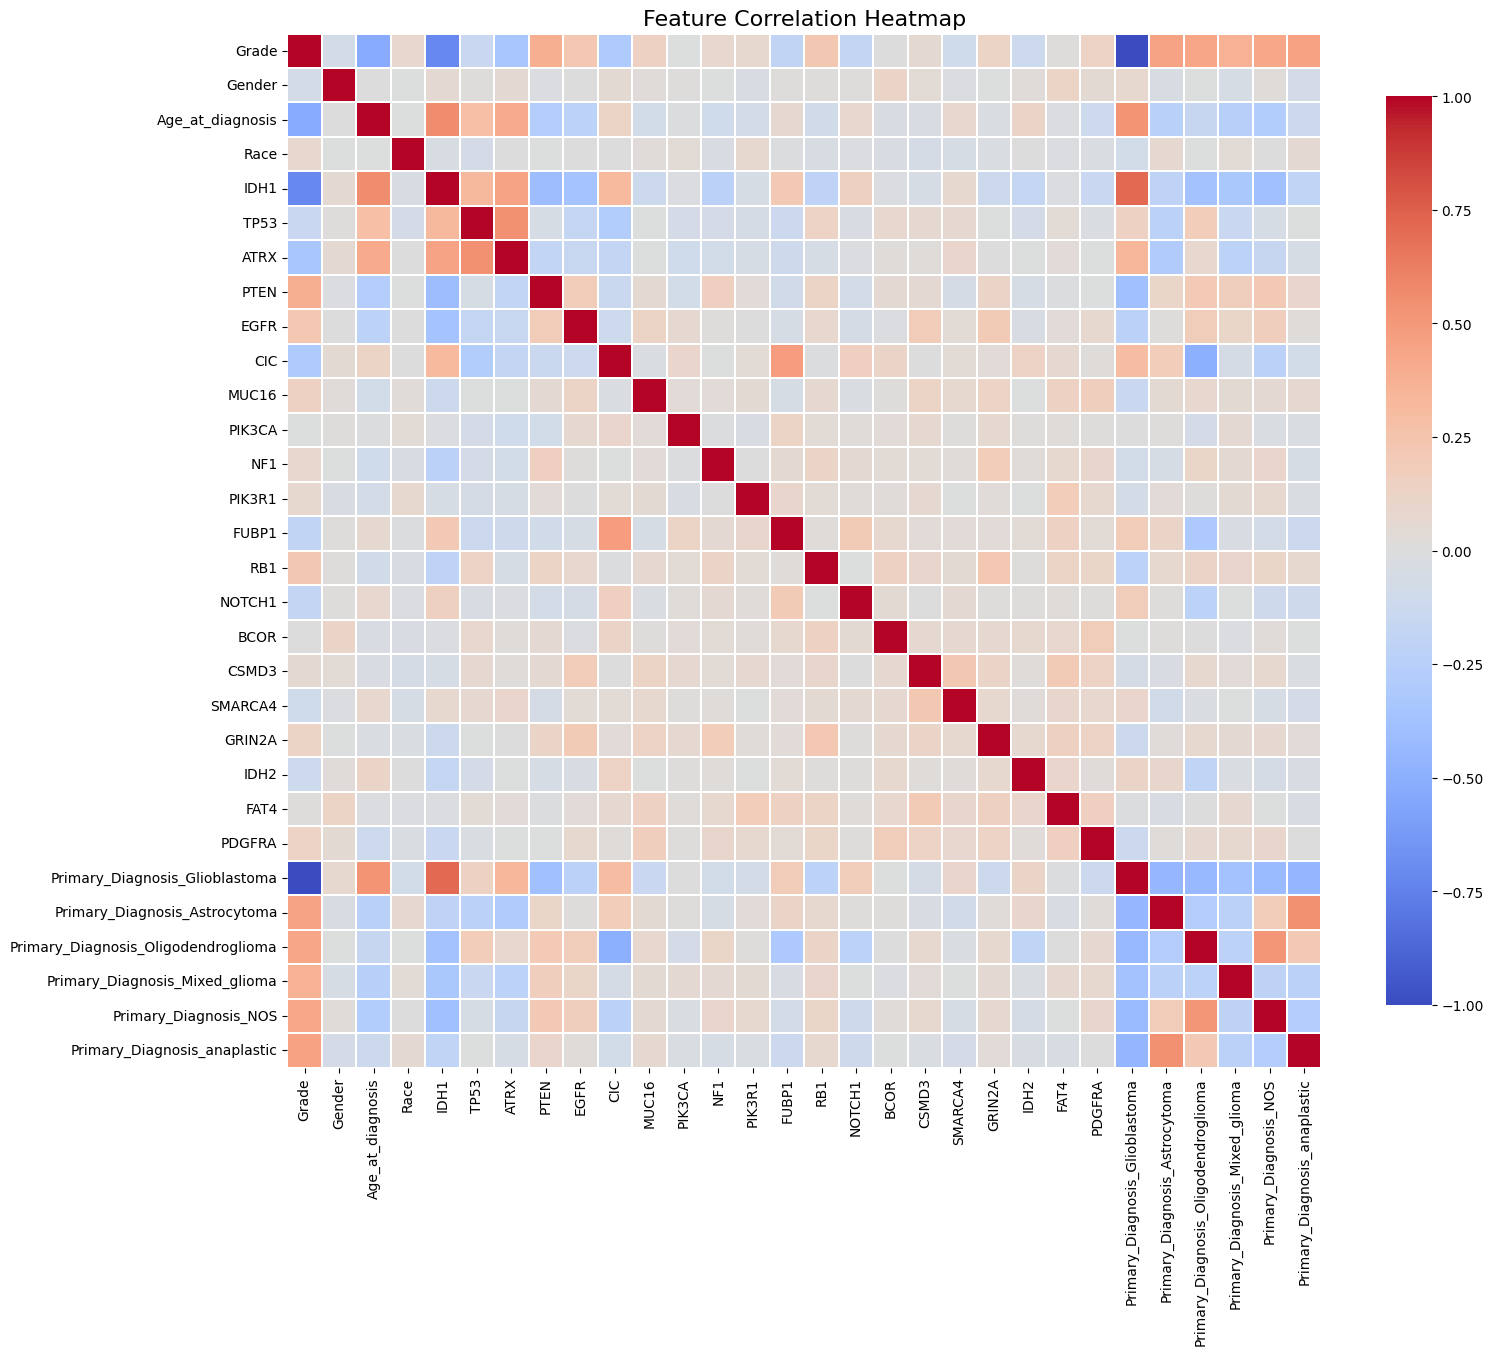

In [33]:
corr_matrix = processed_train_df.corr()
plt.figure(figsize=(16, 14))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8},
    xticklabels=True,
    yticklabels=True
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [38]:
processed_train_df.groupby("Grade")["Age_at_diagnosis"].describe()

,count,mean,std,min,25%,50%,75%,max
Grade,,,,,,,,
0,253.0,22268.351779,4932.757899,7931.0,19250.0,22377.0,26063.0,32590.0
1,349.0,16194.446991,4835.515325,5264.0,12480.0,15503.0,19704.0,31755.0


<Axes: title={'center': 'Age_at_diagnosis'}, xlabel='Grade'>

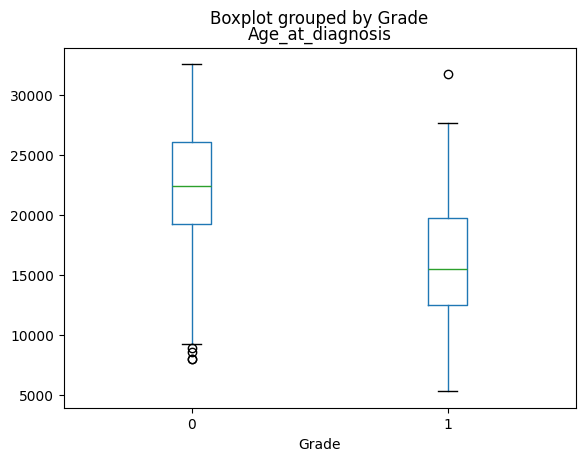

In [40]:
processed_train_df.boxplot(
    column="Age_at_diagnosis",
    by="Grade",
    grid=False
)

In [47]:
gender_labels = processed_train_df["Gender"].map(MAPPING_REVERSED["Gender"])
grade_labels = processed_train_df["Grade"].map(MAPPING_REVERSED["Grade"])

pd.crosstab(
    gender_labels,
    grade_labels,
    normalize="columns"
)

Grade,GBM,LGG
Gender,,
Female,0.375494,0.449857
Male,0.624506,0.550143


In [46]:
race_labels = processed_train_df["Race"].map(MAPPING_REVERSED["Race"])
grade_labels = processed_train_df["Grade"].map(MAPPING_REVERSED["Grade"])

pd.crosstab(
    race_labels,
    grade_labels,
    normalize="columns"
)

Grade,GBM,LGG
Race,,
american indian or alaska native,0.000000,0.002865
asian,0.015810,0.011461
black or african american,0.114625,0.051576
white,0.869565,0.934097


In [48]:
processed_train_df.groupby("Gender")["Age_at_diagnosis"].mean()

Gender
0    18741.817460
1    18750.905714
Name: Age_at_diagnosis, dtype: float64

In [49]:
processed_train_df.groupby("Race")["Age_at_diagnosis"].mean()

Race
0    17320.000000
1    17919.875000
2    19297.936170
3    18714.419414
Name: Age_at_diagnosis, dtype: float64